**<font color=black size=5 face=雅黑>引入第三方库</font>**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier as KNN
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest

**<font color=black size=5 face=雅黑>读取csv数据</font>**

In [2]:
# 读数据
CSV_FILE_PATH = './work/data.csv'
df = pd.read_csv(CSV_FILE_PATH)
print(df.head())

                                                data  target
0  form.search_text=Dell%22%3E%3Cscript%3Ealert(/...       1
1         site=message&msg=<script>alert(1)</script>       1
2  Itemid=%22onmouseover=alert%28document.cookie%...       1
3  uilang=en%22%3E%3Cscript%3Ealert%28document.co...       1
4  msg=<ScRiPt>alert('LastRider-CyberBellona')</S...       1


**<font color=black size=5 face=雅黑>共12个特征 含有某字符的数量（10个特征）、对象长度以及标签是否闭合</font>**

In [3]:
# 目标含有script字符的数量
def script(object):
    count = object.lower().count("script")
    return count
df['script'] = df['data'].apply(script)
# print(df.head())

# 目标中含有java字符的数量
def java(object):
    count = object.lower().count("java")
    return count
df['java'] = df['data'].apply(java)
# print(df.head())

# 目标中含有iframe字符的数量
def iframe(object):
    count = object.lower().count("iframe")
    return count
df['iframe'] = df['data'].apply(iframe)
# print(df.head())

# 目标中含有“<”字符的数量
def left1(object):
    count = object.lower().count("<")
    return count
df['<'] = df['data'].apply(left1)
# print(df.head())

# 目标中含有“>”字符的数量
def right1(object):
    count = object.lower().count(">")
    return count
df['>'] = df['data'].apply(right1)
# print(df.head())

# 目标中含有“'”字符的数量
def gang1(object):
    count = object.lower().count("'")
    return count
df['dian'] = df['data'].apply(gang1)
# print(df.head())

# 目标中含有“"”字符的数量
def gang2(object):
    count = object.lower().count("\"")
    return count
df['"'] = df['data'].apply(gang2)
# print(df.head())

# 目标中含有“%”字符的数量
def baifen(object):
    count = object.lower().count("%")
    return count
df['baifen'] = df['data'].apply(baifen)
# print(df.head())

# 目标中含有“（”字符的数量
def left2(object):
    count = object.lower().count("(")
    return count
df['('] = df['data'].apply(left2)
# print(df.head())

# 目标中含有“）”字符的数量
def right2(object):
    count = object.lower().count(")")
    return count
df[')'] = df['data'].apply(right2)
# print(df.head())

# 目标中含有“<br>”字符的数量
def br(object):
    count = object.lower().count("<br/>")
    return count
df['br'] = df['data'].apply(br)
# print(df.head())

# 目标中是否有不闭合的标签
def isbihe(object):
    count1 = object.lower().count("<")
    count2 = object.lower().count("<")
    allcount = count1 + count2
    if allcount % 2 == 1:
        return 1
    if allcount % 2 ==0:
        return 0
df['isbihe'] = df['data'].apply(isbihe)
# print(df.head())

# 目标的长度
def length(object):
    l = len(object)
    return l
df['length'] = df['data'].apply(length)
print(df.head())

                                                data  target  script  java  \
0  form.search_text=Dell%22%3E%3Cscript%3Ealert(/...       1       2     0   
1         site=message&msg=<script>alert(1)</script>       1       2     0   
2  Itemid=%22onmouseover=alert%28document.cookie%...       1       0     0   
3  uilang=en%22%3E%3Cscript%3Ealert%28document.co...       1       2     0   
4  msg=<ScRiPt>alert('LastRider-CyberBellona')</S...       1       2     0   

   iframe  <  >  dian  "  baifen  (  )  br  isbihe  length  
0       0  1  1     0  0       6  1  1   1       0     115  
1       0  2  2     0  0       0  1  1   0       0      42  
2       0  0  0     0  0       5  0  0   0       0      58  
3       0  1  1     0  0       8  0  0   1       0      71  
4       0  2  2     2  0       0  1  1   0       0      52  


**<font color=black size=5 face=雅黑>写入excel文件</font>**

In [4]:
df.to_csv("./work/Data_after_pro.csv",index=False,sep=',')

**<font color=black size=5 face=雅黑>热力图查看特征之间的相关性</font>**

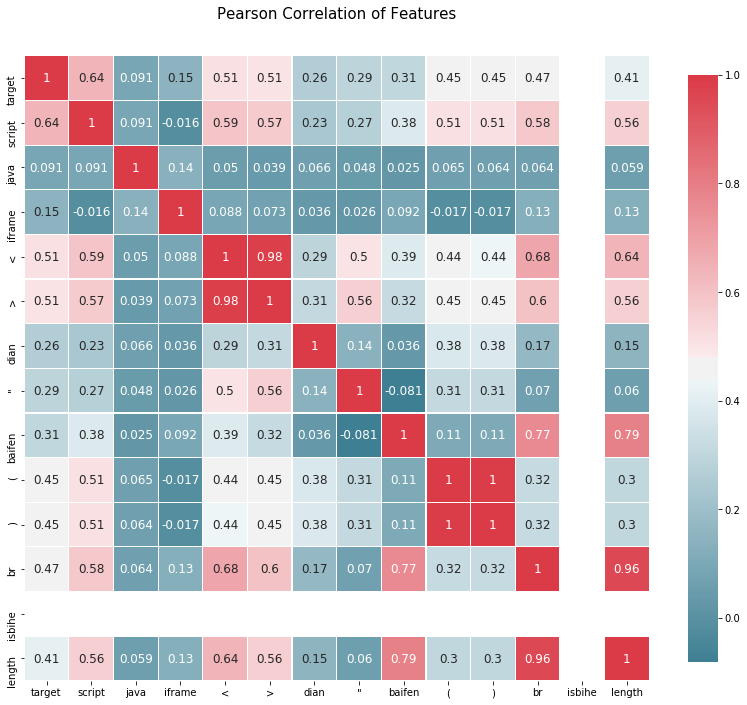

In [5]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    _ = sns.heatmap(df.corr(),cmap = colormap, square=True,cbar_kws={'shrink':.9 }, ax=ax, annot=True, linewidths=0.1,vmax=1.0, linecolor='white',annot_kws={'fontsize':12 })
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    plt.show()
correlation_heatmap(df)

**<font color=black size=5 face=雅黑>拆分训练集和测试集</font>**

In [6]:
data_lite = df[['script', '<','dian','"', 'baifen',
                '(',  'br', 'length', 'target']]
# 下面看一下数据的前五行是不是我们想要的结果
data_dummies = data_lite
print(data_lite.head())
features = data_dummies.loc[:,'script':'length']
X = features.values
y = data_dummies['target'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=9)  # 拆分成训练集和测试集

   script  <  dian  "  baifen  (  br  length  target
0       2  1     0  0       6  1   1     115       1
1       2  2     0  0       0  1   0      42       1
2       0  0     0  0       5  0   0      58       1
3       2  1     0  0       8  0   1      71       1
4       2  2     2  0       0  1   0      52       1


**<font color=black size=5 face=雅黑>随机森林模型进行训练</font>**

In [7]:
# 经过调参后，用75棵树最大深度为5的随机森林拟合数据
forest = RandomForestClassifier(n_estimators=75, criterion='gini', max_depth=5, random_state=0)
forest.fit(X_train, y_train)
# 模型的评估
y_test_pre = forest.predict(X_test)
test_accuracy = forest.score(X_test, y_test)
print("这里是随机森林模型的评估：")
# error = 0
# for i in range(len(X_test)):
#     if forest.predict([X_test[i]])[0] != y_test[i]:
#         error += 1
# print('\n测试集的错误率: %.4f' % (error / float(len(X_test))))
print("\n测试集的accuracy：", test_accuracy)
test_precision = precision_score(y_test, y_test_pre)
print("\n测试集的precision：", test_precision)
test_recall = recall_score(y_test, y_test_pre)
print("\n测试集的召回值：", test_recall)
test_f1 = f1_score(y_test, y_test_pre)
print("\n测试集的f1：", test_f1)

这里是随机森林模型的评估：

测试集的accuracy： 0.9820051413881749

测试集的precision： 0.9968014857614528

测试集的召回值： 0.9680360721442886

测试集的f1： 0.9822082147214315


**<font color=black size=5 face=雅黑>特征重要性排序</font>**

In [8]:
print("这里是特征的重要度排序：\n")
feat_labels = data_lite.columns[0:-1]
print(feat_labels)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

这里是特征的重要度排序：

Index(['script', '<', 'dian', '"', 'baifen', '(', 'br', 'length'], dtype='object')
 1) script                         0.239482
 2) <                              0.230015
 3) baifen                         0.160692
 4) length                         0.141180
 5) br                             0.120834
 6) (                              0.076119
 7) "                              0.025616
 8) dian                           0.006062


**<font color=black size=5 face=雅黑>随机森林树的数量以及最大深度的调参</font>**

In [9]:
#这里是调参的过程，调整树的个数和最大深度
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, train_size=0.7)
# 比较
estimators = [1, 25, 50, 75, 100,200]
depth = [1, 2, 5, 7, 15]
err_list = []
for es in estimators:
    es_list = []
    for d in depth:
        tf = RandomForestClassifier(n_estimators=es, criterion='gini', max_depth=d, max_features=None,
                                    random_state=0)
        tf.fit(x_train2, y_train2)
        st = tf.score(x_test2, y_test2)
        err = 1 - st
        es_list.append(err)
        print("%d决策树数目,%d最大深度,正确率:%.3f%%" % (es, d, st * 100))
        err_list.append(es_list)

1决策树数目,1最大深度,正确率:92.447%
1决策树数目,2最大深度,正确率:97.748%
1决策树数目,5最大深度,正确率:98.159%
1决策树数目,7最大深度,正确率:98.231%
1决策树数目,15最大深度,正确率:98.257%
25决策树数目,1最大深度,正确率:92.447%
25决策树数目,2最大深度,正确率:97.748%
25决策树数目,5最大深度,正确率:98.180%
25决策树数目,7最大深度,正确率:98.206%
25决策树数目,15最大深度,正确率:98.267%
50决策树数目,1最大深度,正确率:92.447%
50决策树数目,2最大深度,正确率:97.748%
50决策树数目,5最大深度,正确率:98.180%
50决策树数目,7最大深度,正确率:98.216%
50决策树数目,15最大深度,正确率:98.283%
75决策树数目,1最大深度,正确率:92.447%
75决策树数目,2最大深度,正确率:97.748%
75决策树数目,5最大深度,正确率:98.180%
75决策树数目,7最大深度,正确率:98.221%
75决策树数目,15最大深度,正确率:98.283%
100决策树数目,1最大深度,正确率:92.447%
100决策树数目,2最大深度,正确率:97.748%
100决策树数目,5最大深度,正确率:98.185%
100决策树数目,7最大深度,正确率:98.221%
100决策树数目,15最大深度,正确率:98.283%
200决策树数目,1最大深度,正确率:92.447%
200决策树数目,2最大深度,正确率:97.748%
200决策树数目,5最大深度,正确率:98.185%
200决策树数目,7最大深度,正确率:98.216%
200决策树数目,15最大深度,正确率:98.288%


**<font color=black size=5 face=雅黑>决策树模型进行训练</font>**

In [10]:
#用最大深度为15的决策树拟合数据
go_dating_tree = tree.DecisionTreeClassifier(max_depth=15)
go_dating_tree.fit(X_train,y_train)
# 模型的评估
y_test_pre = go_dating_tree.predict(X_test)
test_accuracy = go_dating_tree.score(X_test, y_test)
print("这里是决策树模型的评估：")
# error = 0
# for i in range(len(X_test)):
#     if forest.predict([X_test[i]])[0] != y_test[i]:
#         error += 1
# print('\n测试集的错误率: %.4f' % (error / float(len(X_test))))
print("\n测试集的accuracy：", test_accuracy)
test_precision = precision_score(y_test, y_test_pre)
print("\n测试集的precision：", test_precision)
test_recall = recall_score(y_test, y_test_pre)
print("\n测试集的召回值：", test_recall)
test_f1 = f1_score(y_test, y_test_pre)
print("\n测试集的f1：", test_f1)

这里是决策树模型的评估：

测试集的accuracy： 0.9814910025706941

测试集的precision： 0.9974146845915202

测试集的召回值： 0.9664328657314629

测试集的f1： 0.9816793893129772


**<font color=black size=5 face=雅黑>KNN模型进行训练</font>**

In [11]:
knc = KNN(n_neighbors=6, )
knc.fit(X_train, y_train)
y_predict = knc.predict(X_test)
# error =0
# for i in range(len(X_test)):
#     if forest.predict([X_test[i]])[0] != y_test[i]:
#         error += 1
# print('\n测试集的错误率: %.4f' % (error / float(len(X_test))))
print('KNN准确率', knc.score(X_test, y_test))
print('KNN精确率', precision_score(y_test, y_predict, average='macro'))
print('KNN召回率', recall_score(y_test, y_predict, average='macro'))
print('F1', f1_score(y_test, y_predict, average='macro'))

KNN准确率 0.9762982005141388
KNN精确率 0.9765123928227339
KNN召回率 0.9767769964427271
F1 0.9762969192529836


 **<font color=black size=5 face=雅黑>随机森林模型对手动输入的对象进行预测</font>**

In [12]:
# 预测过程
print("请输入您要检测的对象：")
input1 = input()
list = [[]]
# 生成预测域名的特征集
predictlist = [[script(input1), left1(input1),gang1(input1),gang2(input1),baifen(input1), left2(input1),
                br(input1), length(input1)]]
#使用模型做出预测
dating_dec = forest.predict(predictlist)
print('\n')
print('目标检测对象的预测结果如下：\n')
print(input1)
print('\n====================================\n')
if dating_dec == 1:
    print("警告！该对象是个XSS漏洞！")
else:
    print("该对象为良性，不是XSS。")
print('\n====================================')
print('\n\n\n')

请输入您要检测的对象：


请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 